In [17]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as metrics

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']
x.shape

(768, 8)

In [5]:
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns.values)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


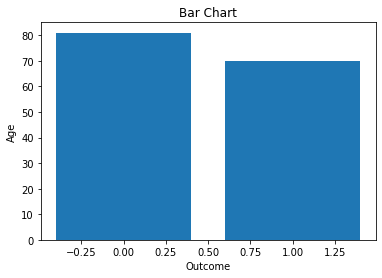

In [20]:

# Bar chart with day against tip
plt.bar(data['Outcome'], data['Age'])
 
plt.title("Bar Chart")
 
# Setting the X and Y labels
plt.xlabel('Outcome')
plt.ylabel('Age')
 
# Adding the legends
plt.show()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, train_size=0.8)

In [7]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(x_train, y_train)

GaussianNB()

In [8]:
gaussian_cv = cross_validate(estimator=gaussian_nb,
                             X=x_valid, y=y_valid,
                             scoring='accuracy', cv=5,
                             return_train_score=True)
gaussian_mean_train_score = round((gaussian_cv['train_score'] * 100).mean(), 3)
gaussian_mean_test_score = round((gaussian_cv['test_score'] * 100).mean(), 3)

In [14]:
gaussian_mean_train_score

82.464

In [15]:
gaussian_mean_test_score

74.083

In [12]:
y_pred =gaussian_nb.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7402597402597403